In [12]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (16/1.5,9/1.5)
plt.rcParams["axes.titlesize"] = 12

In [13]:
def getDFfromSqlite(path,tableName):
    cnx = sqlite3.connect(path)
    return pd.read_sql_query('select * from %s' % tableName,cnx)
    

In [14]:
path ='C:\\Users\\henri\\source\\repos\\mozubi\\winMoz\\winMoz\\Data\\Files\\SQLITE\\mzdb_marketResults.db'
df = getDFfromSqlite(path, 'DayAheadResults')
df.head()

Id            TimeStamp ShortCode     Price  Volume  IsBlock
0   1  2015-01-01 00:00:00        H0 -1.186820     0.0        0
1   2  2015-01-01 00:00:00        DB  2.961424     0.0        1
2   3  2015-01-01 23:00:00       H23 -2.202810     0.0        0
3   4  2015-01-01 22:00:00       H22  3.779683     0.0        0
4   5  2015-01-01 21:00:00       H21  1.836862     0.0        0

In [22]:
df = df[~df.ShortCode.str.contains("D")]
df = df[~df.ShortCode.str.contains("N")]
df = df.sort_values(by='TimeStamp')
df = df.reset_index()
df.head()

Id            TimeStamp ShortCode     Price  Volume  IsBlock
0    1  2015-01-01 00:00:00        H0 -1.186820     0.0        0
24  25  2015-01-01 01:00:00        H1 -1.186820     0.0        0
23  24  2015-01-01 02:00:00        H2  0.642917     0.0        0
22  23  2015-01-01 03:00:00        H3  1.463045     0.0        0
21  22  2015-01-01 04:00:00        H4  1.905815     0.0        0

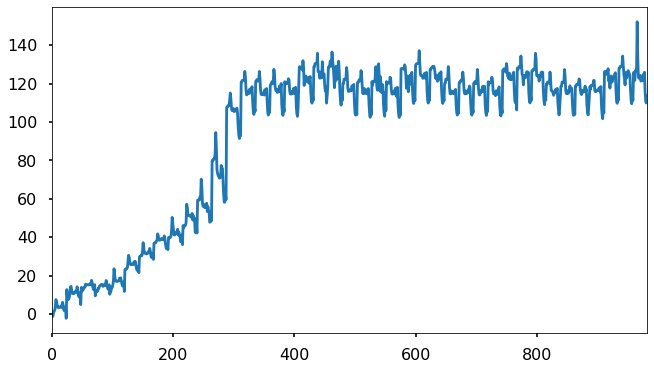

In [37]:
df.Price.plot()